<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию" data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-и-дубликатов" data-toc-modified-id="Обработка-пропусков-и-дубликатов-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Обработка пропусков и дубликатов</a></span></li><li><span><a href="#Подготовка-данных-для-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-машинного-обучения-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Подготовка данных для машинного обучения</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделим-выборку-на-3-части" data-toc-modified-id="Разделим-выборку-на-3-части-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделим выборку на 3 части</a></span></li><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Проверка-моделей-без-учета-дисбаланса" data-toc-modified-id="Проверка-моделей-без-учета-дисбаланса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка моделей без учета дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Открываем файл с данными и изучаем общую информацию

In [1]:
!pip install phik

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from phik import phik_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils import shuffle

from sklearn.preprocessing import OneHotEncoder

In [3]:
 # чтение файла с данными
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('C:/Users/Alexandra/datasets/Churn.csv')

In [4]:
#Выводим первые 10 строчек датафрейма data на экран.
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
data.info() #Выводим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Вывод:**


В датасете 10000 строк и 13 столбцов. В столбце **Tenure (сколько лет человек является клиентом банка)** имеются неопределенные значения.

#### Обработка пропусков и дубликатов

In [6]:
#Посчитаем количество полных дубликатов.
data.duplicated().sum()

0

In [7]:
data.isna().sum() # Выводим количество пропущенных значений для каждого столбца.

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,9.000000
Balance,0.000000
NumOfProducts,0.000000


В столбце **Tenure** пропущено 9% значений. Удаляем.

In [9]:
data['Tenure'].unique() #уникальные значения Tenure содержат только целочисленные значения

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [10]:
# Удаляем пропуски и меняем тип данных на целочисленный
data.dropna(subset = ['Tenure'], inplace = True)
data['Tenure'] = data['Tenure'].astype(int)

In [11]:
# Проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   int32  
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(2), int32(1), int64(8), object(3)
memory usage: 1.0+ MB


#### Подготовка данных для машинного обучения

**RowNumber (индекс строки в данных)**  и **CustomerId (уникальный идентификатор клиента)** присваиваются системой случайно. Никак не зависят от действий пользователя. 
    
**Surname (фамилия)** присвается в загсе и никак не зависит от банка. Не влияет на исследование.

Поэтому эти столбцы удаляем.

In [12]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   int32  
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 816.8+ KB


interval columns not set, guessing: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


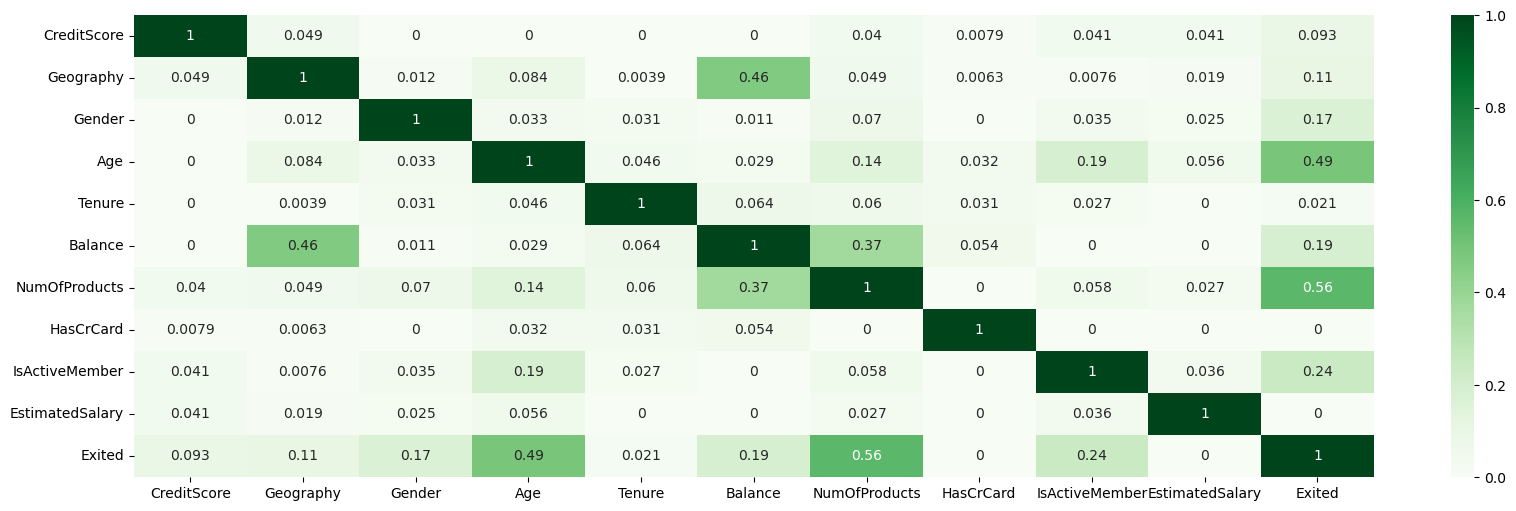

In [14]:
# Проверим признаки на мультиколлинеарность методом phik_matrix

corr_matrix = phik_matrix(data)

fig, ax = plt.subplots(figsize=(20, 6), dpi=100)
sns.heatmap(corr_matrix, annot=True, cmap='Greens', vmin=0, ax=ax);

Корреляция между признаками небольшая. Оставляем все признаки.

Проверим уникальные значения для категоральных признаков.

In [15]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

OHE можно применить к **Gender и Geography**.

К столбцам **CreditScore, Age, Tenure, Balance, NumOfProducts и EstimatedSalary** применим масштабирование.

In [17]:
encoder = OneHotEncoder(drop='first')

#Определяем колонки для кодирования
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Geography','Gender']]).toarray())

#соединяем one-hot encoded колонки с начальным датасетом
final_df = data.join (encoder_df)


#удаляем кодируемые колонки
final_df.drop(['Geography','Gender'], axis= 1, inplace= True)

#переименовываем полученные столбцы
final_df.columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
#Проверяем
print(final_df.head(10))

final_df.info()

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   
5          645   44       8  113755.78              2          1   
6          822   50       7       0.00              2          1   
7          376   29       4  115046.74              4          1   
8          501   44       4  142051.07              2          0   
9          684   27       2  134603.88              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                0.0   
1               1        112542.58       0                0.0   
2               0        113931.57       1              

In [18]:
#применяем OHE к 2 признакам
data = pd.get_dummies(data, drop_first=True)

In [19]:
data.head(10) # проверяем

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


## Исследование задачи

### Разделим выборку на 3 части

**Exited** (факт ухода клиента) - целевой признак. Все остальные - признаки, которые влияют на целевой признак.

In [20]:
train, valid, test = np.split(data.sample(frac=1, random_state=821), [int(.6*len(data)), int(.8*len(data))])

In [21]:
# Проверяем сколько строк и столбцов в полученных датасетах
print(train.shape)
print(valid.shape)
test.shape

(5454, 12)
(1818, 12)


(1819, 12)

In [22]:
# Масштабирование признаков CreditScore, Age, Tenure, Balance, NumOfProducts и EstimatedSalary
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()


scaler.fit(train[cols_to_scale])
train[cols_to_scale] = scaler.transform(train[cols_to_scale])
print(train.head())

scaler.fit(valid[cols_to_scale])
valid[cols_to_scale] = scaler.transform(valid[cols_to_scale])

scaler.fit(test[cols_to_scale])
test[cols_to_scale] = scaler.transform(test[cols_to_scale])

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
1615     0.368653 -1.704038  0.343761  0.357046      -0.918424          1   
4277     1.298448  1.133569 -1.037361  0.773672      -0.918424          1   
7210    -0.013597 -1.041930  1.379602  0.426833      -0.918424          1   
3382     0.058721  3.119893 -0.001519  1.004462       0.826294          1   
4345     0.730240  0.660634 -0.692080  0.342303      -0.918424          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
1615               1         1.128568       0                  1   
4277               1         0.603429       0                  1   
7210               1         1.004986       0                  0   
3382               1        -0.007585       0                  1   
4345               1         0.579236       1                  1   

      Geography_Spain  Gender_Male  
1615                0            0  
4277                0            1  
7210             

Разделили датасет на 3 части в соотношении **60/20/20**.

In [23]:
target_train = train['Exited']
features_train = train.drop(['Exited'], axis=1)

target_valid = valid['Exited']
features_valid = valid.drop(['Exited'], axis=1)

target_test = test['Exited']
features_test = test.drop(['Exited'], axis=1)

In [24]:
target_train.shape

(5454,)

### Исследование баланса классов

0    0.796062
1    0.203938
Name: Exited, dtype: float64


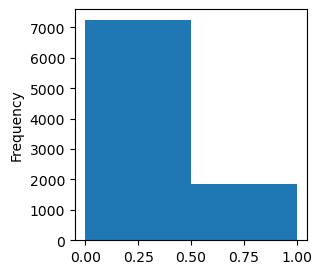

In [25]:
print(data['Exited'].value_counts(normalize=1))
data['Exited'].plot(kind ='hist', bins=2, figsize=(3,3));

Из полученных данных видно, что в целевом признаке наблюдается достаточно сильный дисбаланс классов.Только 20% отражают факт ухода клиента. Разница почти в **4** раза.

### Проверка моделей без учета дисбаланса

In [26]:
# Выбираем параметр random_state
RANDOM_STATE = 5550111

#### Дерево решений

In [27]:
best_roc_auc = 0
best_f1 = 0
best_depth = 0
best_model = None
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth) 
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    
    if f1_tree > best_f1:
        best_model = model
        best_depth = depth
        best_f1 = f1_tree
        best_roc_auc = roc_auc
        
print("Лучшая F1-мера:", best_f1, "Глубина дерева:", best_depth)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера: 0.5913312693498453 Глубина дерева: 7
Roc-auc-score: 0.8404185190027894


#### Случайный лес

In [28]:
best_roc_auc = 0
best_f1 = 0
best_est = 0
best_depth = 0
best_model = None
for est in range(20, 50):
    for depth in range(10, 25):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth = depth) 
        model.fit(features_train, target_train) # обучите модель на тренировочной выборке
        predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
        f1_tree = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    
        if f1_tree > best_f1:
            best_model = model
            best_est = est
            best_depth = depth
            best_f1 = f1_tree
            best_roc_auc = roc_auc

print("Лучшая F1-мера", best_f1, "Количество деревьев:", best_est, "Глубина дерева:", best_depth)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.6134585289514867 Количество деревьев: 37 Глубина дерева: 20
Roc-auc-score: 0.8528228149697815


#### Логистическая регрессия

In [29]:
best_roc_auc = 0
best_f1 = 0
best_max_iter = 0
for max_iter in range(10, 50):
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=max_iter)  
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
   
    if f1_tree > best_f1:
        best_max_iter = max_iter
        best_f1 = f1_tree
        best_roc_auc = roc_auc
print("Лучшая F1-мера", best_f1, "Глубина дерева:", best_max_iter)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.2701612903225806 Глубина дерева: 10
Roc-auc-score: 0.7763830776383077


In [30]:
best_roc_auc = 0
best_f1 = 0
best_max_iter = 0
for max_iter in range(100, 1000, 100):
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=max_iter)  
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
   
    if f1_tree > best_f1:
        best_max_iter = max_iter
        best_f1 = f1_tree
        best_roc_auc = roc_auc
print("Лучшая F1-мера", best_f1, "Глубина дерева:", best_max_iter)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.2701612903225806 Глубина дерева: 100
Roc-auc-score: 0.7763830776383077


**Вывод:**

Оценим модель по F1-мере и Roc-auc-score.

|МОДЕЛЬ   	|F1-мера   	|Roc-auc-score   	|   
|:---	|:---:	|:---:	|
|Дерево решений   	|0.5913312693498453   	|0.8404185190027894   	|   
|**Случайный лес**   	|**0.6134585289514867**   	|**0.8528228149697815**   	| 
|Логистическая регрессия   	|0.2701612903225806   	|0.7763830776383077   	|  

Лучший результат показала модель **Случайный лес**


## Борьба с дисбалансом

Рассмотрим 3 метода для работы с дисбалансом:
1. Взвешивание классов
2. Увеличение выборки
3. Уменьшение выборки

### Взвешивание классов

In [31]:
# Добавляем class_weight='balanced' в модели.

# Дерево решений    
best_roc_auc = 0
best_f1 = 0
best_depth = 0
best_model = None
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, class_weight='balanced') 
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    
    if f1_tree > best_f1:
        best_model = model
        best_depth = depth
        best_f1 = f1_tree
        best_roc_auc = roc_auc
        
print("Лучшая F1-мера:", best_f1, "Глубина дерева:", best_depth)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера: 0.5904761904761905 Глубина дерева: 8
Roc-auc-score: 0.8275338868549512


In [32]:
# Случайный лес
best_roc_auc = 0
best_f1 = 0
best_est = 0
best_depth = 0
best_model = None
for est in range(20, 50):
    for depth in range(10, 25):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth = depth, class_weight='balanced') 
        model.fit(features_train, target_train) # обучите модель на тренировочной выборке
        predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
        f1_tree = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    
        if f1_tree > best_f1:
            best_model = model
            best_est = est
            best_depth = depth
            best_f1 = f1_tree
            best_roc_auc = roc_auc

print("Лучшая F1-мера", best_f1, "Количество деревьев:", best_est, "Глубина дерева:", best_depth)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.6378378378378379 Количество деревьев: 49 Глубина дерева: 11
Roc-auc-score: 0.8643418032310554


In [33]:
# Логистическая регрессия
best_roc_auc = 0
best_f1 = 0
best_max_iter = 0
for max_iter in range(100, 1000, 100):
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=max_iter, class_weight='balanced')  
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
   
    if f1_tree > best_f1:
        best_max_iter = max_iter
        best_f1 = f1_tree
        best_roc_auc = roc_auc
print("Лучшая F1-мера", best_f1, "Глубина дерева:", best_max_iter)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.5132575757575757 Глубина дерева: 100
Roc-auc-score: 0.7801985268479777


**Вывод:**

Качество модели у Дерева решений немного ухудшилось. 

Для случайного леса улучшение (бьло - 0.6134585289514867, стало - 0.6378378378378379).

У **Логистической регрессии** качество повысилось значительно с 0.2701612903225806 до **0.5132575757575757**.

### Увеличение выборки

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

0    0.500803
1    0.499197
Name: Exited, dtype: float64


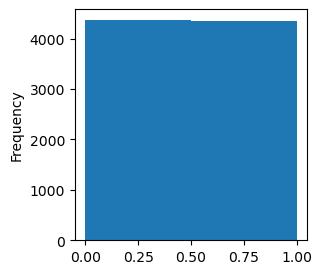

In [35]:
print(target_upsampled.value_counts(normalize=1))
target_upsampled.plot(kind ='hist', bins=2, figsize=(3,3));

In [36]:
# Дерево решений
best_roc_auc = 0
best_f1 = 0
best_depth = 0
best_model = None
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth) 
    model.fit(features_upsampled, target_upsampled) # обучите модель на увеличенной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    
    if f1_tree > best_f1:
        best_model = model
        best_depth = depth
        best_f1 = f1_tree
        best_roc_auc = roc_auc
        
print("Лучшая F1-мера:", best_f1, "Глубина дерева:", best_depth)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера: 0.5874867444326618 Глубина дерева: 8
Roc-auc-score: 0.8226197480822872


In [37]:
# Случайный лес
best_roc_auc = 0
best_f1 = 0
best_est = 0
best_depth = 0
best_model = None
for est in range(20, 50):
    for depth in range(10, 25):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth = depth) 
        model.fit(features_upsampled, target_upsampled) # обучите модель на увеличенной выборке
        predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
        f1_tree = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    
        if f1_tree > best_f1:
            best_model = model
            best_est = est
            best_depth = depth
            best_f1 = f1_tree
            best_roc_auc = roc_auc

print("Лучшая F1-мера", best_f1, "Количество деревьев:", best_est, "Глубина дерева:", best_depth)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.647130647130647 Количество деревьев: 43 Глубина дерева: 11
Roc-auc-score: 0.8682716614365411


In [38]:
# Логистическая регрессия
best_roc_auc = 0
best_f1 = 0
best_max_iter = 0
for max_iter in range(100, 1000, 100):
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=max_iter)  
    model.fit(features_upsampled, target_upsampled) # обучите модель на увеличенной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
   
    if f1_tree > best_f1:
        best_max_iter = max_iter
        best_f1 = f1_tree
        best_roc_auc = roc_auc
print("Лучшая F1-мера", best_f1, "Глубина дерева:", best_max_iter)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.5142314990512334 Глубина дерева: 100
Roc-auc-score: 0.7801948948163645


**Вывод:**

При увеличении выборки получили результаты:
1. Дерево решений - 0.5874867444326618 (хуже, чем с дисбалансом)
2. Случайный лес - 0.647130647130647 (небольшое улучшение)
3. Логистическая регрессия - 0.49370277078085634 (улучшение значительное)

Лучший результат показала модель **Случайный лес**

### Уменьшение выборки

In [39]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25) # уменьшим количество нулевых значений в 4 раза

0    0.500917
1    0.499083
Name: Exited, dtype: float64


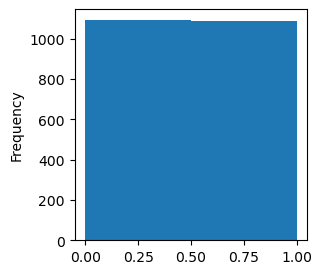

In [40]:
print(target_downsampled.value_counts(normalize=1))
target_downsampled.plot(kind ='hist', bins=2, figsize=(3,3));

In [41]:
# Дерево решений
best_roc_auc = 0
best_f1 = 0
best_depth = 0
best_model = None
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth) 
    model.fit(features_downsampled, target_downsampled) # обучите модель на уменьшенной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    
    if f1_tree > best_f1:
        best_model = model
        best_depth = depth
        best_f1 = f1_tree
        best_roc_auc = roc_auc
        
print("Лучшая F1-мера:", best_f1, "Глубина дерева:", best_depth)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера: 0.5841836734693876 Глубина дерева: 3
Roc-auc-score: 0.7983577769060902


In [42]:
# Случайный лес
best_roc_auc = 0
best_f1 = 0
best_est = 0
best_depth = 0
best_model = None
for est in range(20, 50):
    for depth in range(10, 25):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth = depth) 
        model.fit(features_downsampled, target_downsampled) # обучите модель на уменьшенной выборке
        predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
        f1_tree = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
    
        if f1_tree > best_f1:
            best_model = model
            best_est = est
            best_depth = depth
            best_f1 = f1_tree
            best_roc_auc = roc_auc

print("Лучшая F1-мера", best_f1, "Количество деревьев:", best_est, "Глубина дерева:", best_depth)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.611740473738414 Количество деревьев: 47 Глубина дерева: 12
Roc-auc-score: 0.8574718154346815


In [43]:
# Логистическая регрессия
best_roc_auc = 0
best_f1 = 0
best_max_iter = 0
for max_iter in range(100, 1000, 100):
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=max_iter)  
    model.fit(features_downsampled, target_downsampled) # обучите модель на увеличенной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке
      
    f1_tree = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])
   
    if f1_tree > best_f1:
        best_max_iter = max_iter
        best_f1 = f1_tree
        best_roc_auc = roc_auc
print("Лучшая F1-мера", best_f1, "Глубина дерева:", best_max_iter)
print("Roc-auc-score:", best_roc_auc)

Лучшая F1-мера 0.5223171889838557 Глубина дерева: 100
Roc-auc-score: 0.7807269874476988


**Вывод:**

При уменьшении выборки получили результаты:
1. Дерево решений - 0.5841836734693876
2. Случайный лес - 0.611740473738414
3. Логистическая регрессия - 0.5223171889838557

При уменьшении выборки f1-мера увеличилась только для Логистической регрессии.

Наилучший результат получили при **увеличении выборки** для Случайного леса. 


| Метрики  	|F1-мера   	|Roc-auc-score   	|   
|:---	|:---:	|:---:	|
|Было   	|0.6134585289514867   	|0.8528228149697815   	| 
|**Стало**   	|**0.647130647130647**  	|**0.8682716614365411**   	|  



## Тестирование модели

In [44]:
# Случайный лес увеличенная выборка

# Проведем тестирование на лучшей полученной модели Случайный лес
# Лучшая F1-мера 0.647130647130647 Количество деревьев: 43 Глубина дерева: 11
# Roc-auc-score: 0.8682716614365411

best_est = 43
best_depth = 11

model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=best_est, max_depth = best_depth)
model.fit(features_upsampled, target_upsampled) # обучите модель на увеличенной выборке 
predictions_test = model.predict(features_test) # предсказания модели на тестовой выборке
     
f1_tree = f1_score(target_test, predictions_test)

print("F1-мера", f1_tree, "Количество деревьев:", best_est, "Глубина дерева:", best_depth)

print("Полнота recall:", recall_score(target_test, predictions_test))
print("Точность precision:", precision_score(target_test, predictions_test))


probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

F1-мера 0.6020151133501259 Количество деревьев: 43 Глубина дерева: 11
Полнота recall: 0.6256544502617801
Точность precision: 0.5800970873786407


Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — **AUC-ROC** и построим график.

ROC-AUC: 0.8532683346267491


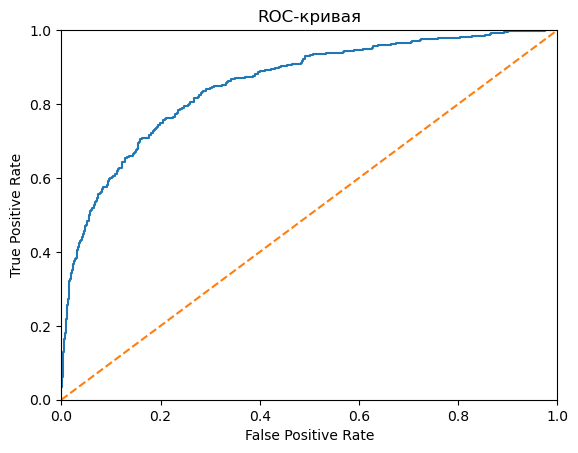

In [45]:
print("ROC-AUC:", roc_auc_score(target_test, probabilities_one_test))

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr, linestyle='solid')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');


## Общие выводы

При исследовании данных были выявлены пропуски в столбце **Tenure**. Заменены на нули. Формат данных в этом столбце заменен на целочисленные.

Для построения модели машинного обучения столбцы **RowNumber (индекс строки в данных), CustomerId (уникальный идентификатор клиента) и Surname (фамилия)** не учитывались. Разделили датасет на 3 части в соотношении 60/20/20.

Дополнительно проведена проверка на наличие мультиколлинеарности. Она отсутствует.

Техника **One-Hot Ecnoding** применена к **Gender и Geography.**

К столбцам **CreditScore, Age, Tenure, Balance, NumOfProducts и EstimatedSalary** применили масштабирование

Целевой признак **Exited (факт ухода клиента)**. Проверка на дисбаланс показала, что разница почти в **4** раза. (20% клиентов уходят).

Была проведена проверка моделей без учета дисбаланса целевого признака.
Лучший результат показала модель **Случайный лес** F1-мера 0.6134585289514867.

Улучшение качества модели за счет учитывания дисбаланса классов проводилось тремя методами:
1. Взвешивание классов
2. Увеличение выборки (upsampling)
3. Уменьшение выборки (downsampling)

Применяя эти методы удалось значительно повысить F1-меру для модели **Логистической регрессии**.

Наилучший результат был получен при увеличении выборки для **Случайного леса**. F1-мера 0.647130647130647, Roc-auc-score: 0.8682716614365411

На тестовой выборке получились такие метрики:
- F1-мера 0.6020151133501259
- Полнота recall: 0.6256544502617801
- Точность precision: 0.5800970873786407
- ROC-AUC: 0.8532683346267491